# Titanic: Machine Learning from Disaster

In [155]:
% matplotlib inline

import copy

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
matplotlib.style.use('ggplot')
from __future__ import print_function
from sklearn.cross_validation import train_test_split

In [156]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [157]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
print('Number of Rows: %i   Number of Columns: %i' % train_data.shape)

Number of Rows: 891   Number of Columns: 12


In [159]:
print('Number of Rows: %i   Number of Columns: %i' % test_data.shape)

Number of Rows: 418   Number of Columns: 11


In [160]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [161]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## データ理解

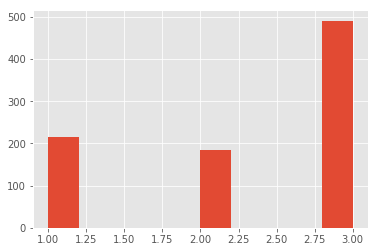

In [163]:
train_data['Pclass'].hist()

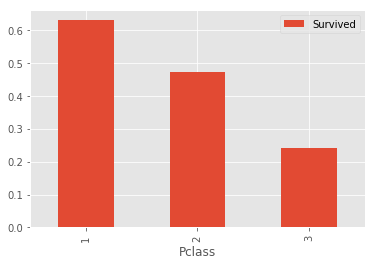

In [164]:
price_by_condition = \
 train_data.groupby('Pclass').aggregate({'Survived': np.mean}).reset_index()
price_by_condition.plot.bar(x='Pclass')

# 欠損値

In [165]:
col_names = train_data.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(train_data[col_name]))
    print(col_name, '; # of missing record: ', missing_num)

PassengerId ; # of missing record:  0
Survived ; # of missing record:  0
Pclass ; # of missing record:  0
Name ; # of missing record:  0
Sex ; # of missing record:  0
Age ; # of missing record:  177
SibSp ; # of missing record:  0
Parch ; # of missing record:  0
Ticket ; # of missing record:  0
Fare ; # of missing record:  0
Cabin ; # of missing record:  687
Embarked ; # of missing record:  2


In [217]:
col_names = test_data.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(test_data[col_name]))
    print(col_name, '; # of missing record: ', missing_num)

PassengerId ; # of missing record:  0
Pclass ; # of missing record:  0
Name ; # of missing record:  0
Age ; # of missing record:  86
SibSp ; # of missing record:  0
Parch ; # of missing record:  0
Ticket ; # of missing record:  0
Fare ; # of missing record:  1
Cabin ; # of missing record:  327
Embarked ; # of missing record:  0
Sex_female ; # of missing record:  0
Sex_male ; # of missing record:  0


## 特徴量の作成

### ダミー変数

In [166]:
train_data = pd.get_dummies(train_data, columns=['Sex'])

In [187]:
test_data = pd.get_dummies(test_data, columns=['Sex'])

## 変数選択

In [218]:
target_col = 'Survived'
exclude_cols = ['Survived', 'PassengerId',
                'Name','Age','Ticket','Fare','Cabin','Embarked']
feature_cols = [col for col in train_data.columns if col not in exclude_cols]

In [219]:
feature_cols

['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male']

In [220]:
y = np.array(train_data[target_col])
X = np.array(train_data[feature_cols])

In [221]:
X_train, X_test, y_train, y_test = \
 train_test_split(X, y, test_size=0.3, random_state=1234)

## モデリング

In [222]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

<h3>ランダムフォレスト</h3>

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

### ハイパーパラメーターのチューニング

In [224]:
params = {'n_estimators' :[300, 500, 1000], 'max_depth':[3, 5, 10, None]}

In [225]:
rf = RandomForestClassifier()

In [226]:
gcv = GridSearchCV(rf, param_grid=params, n_jobs=-1, scoring='roc_auc')

In [227]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 500, 1000], 'max_depth': [3, 5, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [228]:
gcv.best_params_

{'max_depth': 3, 'n_estimators': 1000}

In [229]:
gcv.best_score_

0.8472801152664905

### チューニングしたパラメータでモデリング

In [230]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=3)

In [231]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [232]:
y_pred_proba = rf.predict_proba(X_test)

### モデルの評価

AUC

In [233]:
roc_auc_score(y_true=y_test, y_score=y_pred_proba[:,1])

0.85329553508150258

Confusion matrix

In [234]:
cutoff_score = 0.5
ypred_flag = (y_pred_proba[:,1] > cutoff_score).astype(np.int)

In [235]:
confusion_matrix(y_true=y_test, y_pred=ypred_flag)

array([[154,  12],
       [ 33,  69]])

Precision, Recall, F1-score

In [236]:
print(classification_report(y_true=y_test, y_pred=ypred_flag))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87       166
          1       0.85      0.68      0.75       102

avg / total       0.83      0.83      0.83       268



### テストデータで予測

In [237]:
test_X = np.array(test_data[feature_cols])

In [241]:
test_y_pred_proba = rf.predict_proba(test_X)

In [242]:
test_ypred_flag = (test_y_pred_proba[:,1] > cutoff_score).astype(np.int)

In [244]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": test_ypred_flag
    })
submission.to_csv('titanic.csv', index=False)